#Soru-2: Farklı büyüklüklerde 3 Yapay Sinir Ağı ile Performans Karşılaştırması

- Veri Seti Kaggle üzerinden indirilecektir.
- Veri Seti: https://www.kaggle.com/datasets/chopper53/machine-learning-engineer-salary-in-2024/data

Eğitirken 3 farklı büyüklükte ağ oluşturunuz ve bu ağlarının performanslarını karşılaştırınız. Veri setinde fiyat ile ilgili bir kısım var ise bunu TL cinsinden ifade etmeyi unutmayınız. Test için %10‘luk bir kesimi random_state değerini 58 kullanarak ayrınız.


Adımlar:



In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [52]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep_Learning/salaries.csv")

In [53]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M


In [54]:
data.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
16489,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16490,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16491,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16492,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
16493,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [56]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,16494.0,2023.224991,0.713405,2020.0,2023.0,2023.0,2024.00,2024.0
salary,16494.0,163787.809628,340601.702339,14000.0,102000.0,142200.0,187342.25,30400000.0
salary_in_usd,16494.0,149713.575725,68516.136918,15000.0,101517.5,141300.0,185900.00,800000.0
remote_ratio,16494.0,32.044986,46.260201,0.0,0.0,0.0,100.00,100.0


In [57]:
data.keys()

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [58]:
print("Dataset shape:", data.shape)

Dataset shape: (16494, 11)


In [59]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [60]:
data.nunique()

work_year                5
experience_level         4
employment_type          4
job_title              155
salary                2552
salary_currency         23
salary_in_usd         2931
employee_residence      88
remote_ratio             3
company_location        77
company_size             3
dtype: int64

In [61]:
data.salary_currency.unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'DKK', 'INR', 'ILS', 'BRL', 'CHF',
       'NZD', 'AUD', 'PLN', 'PHP', 'TRY', 'NOK', 'JPY', 'ZAR', 'HKD',
       'SGD', 'THB', 'HUF', 'MXN', 'CLP'], dtype=object)

In [62]:
data["salary_currency"] = "TRY"

In [63]:
#data.salary_currency.unique()

In [64]:
data['job_title'].value_counts().head(5)

job_title
Data Engineer                3456
Data Scientist               3312
Data Analyst                 2428
Machine Learning Engineer    1703
Research Scientist            529
Name: count, dtype: int64

In [65]:
data['employment_type'].value_counts().head()

employment_type
FT    16414
PT       38
CT       28
FL       14
Name: count, dtype: int64

In [66]:
data['remote_ratio']

0          0
1          0
2          0
3          0
4          0
        ... 
16489    100
16490    100
16491    100
16492    100
16493     50
Name: remote_ratio, Length: 16494, dtype: int64

In [67]:
data['remote_ratio'].value_counts().head()

remote_ratio
0      11084
100     5161
50       249
Name: count, dtype: int64

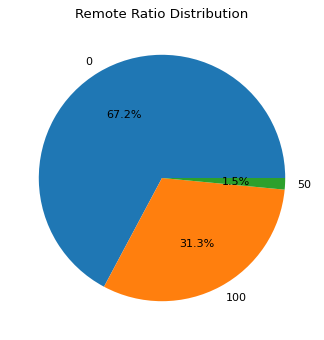

In [68]:
plt.figure(figsize=(6,5),dpi=80)
level_counts = data['remote_ratio'].value_counts()
plt.pie(level_counts.values, labels=level_counts.index, autopct='%1.1f%%')
plt.title('Remote Ratio Distribution')
plt.show()

In [69]:
data['company_location'].value_counts().head(5)

company_location
US    14478
GB      694
CA      455
ES      133
DE      105
Name: count, dtype: int64

In [70]:
data['experience_level'].value_counts().head()

experience_level
SE    10652
MI     4024
EN     1319
EX      499
Name: count, dtype: int64

In [75]:
print("Sizes\n")
print(data["company_size"].unique())

Sizes

['S' 'M' 'L']


In [74]:
data.describe(include=object)

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,16494,16494,16494,16494,16494,16494,16494
unique,4,4,155,1,88,77,3
top,SE,FT,Data Engineer,TRY,US,US,M
freq,10652,16414,3456,16494,14427,14478,15268


In [77]:
import seaborn as sns

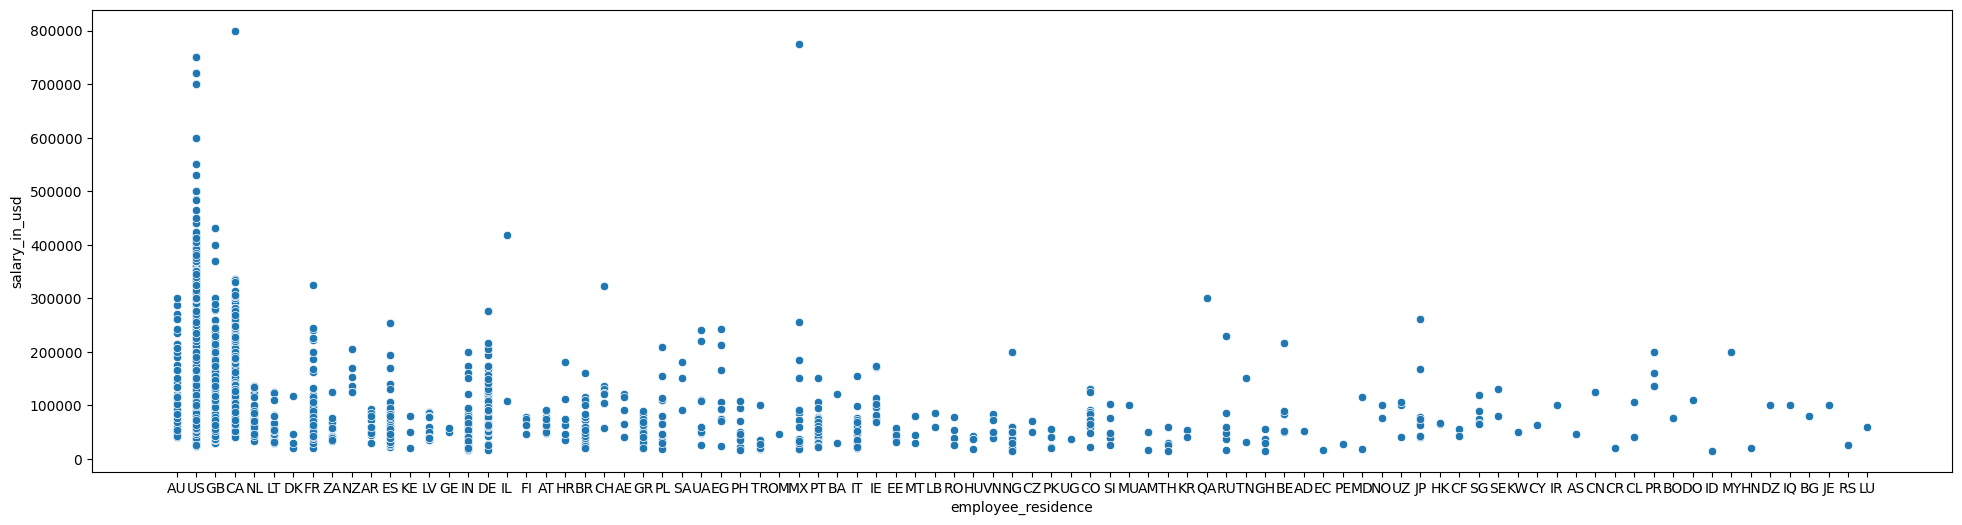

In [78]:
plt.figure(figsize=(24, 6))
sns.scatterplot(data=data,x="employee_residence",y="salary_in_usd")
plt.show()

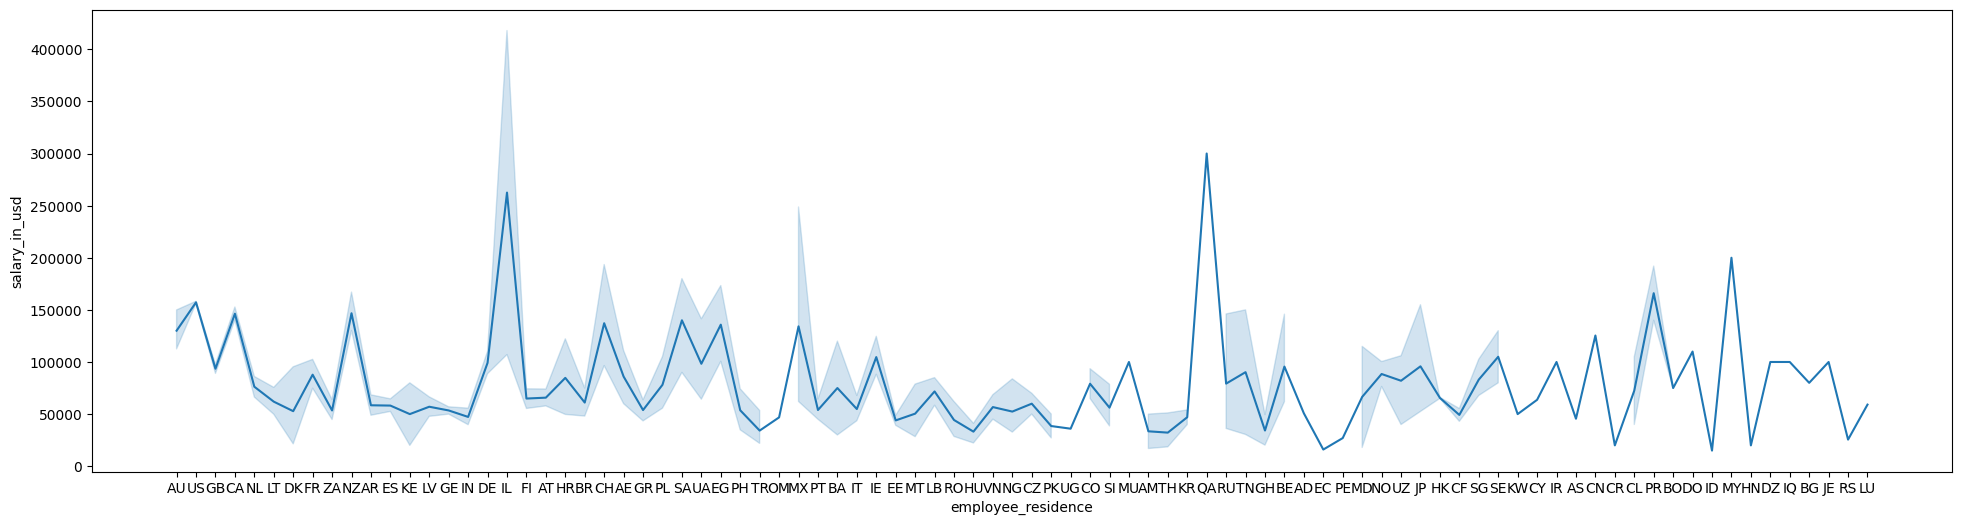

In [79]:
plt.figure(figsize=(24, 6))
sns.lineplot(data=data, x="employee_residence", y="salary_in_usd")
plt.show()

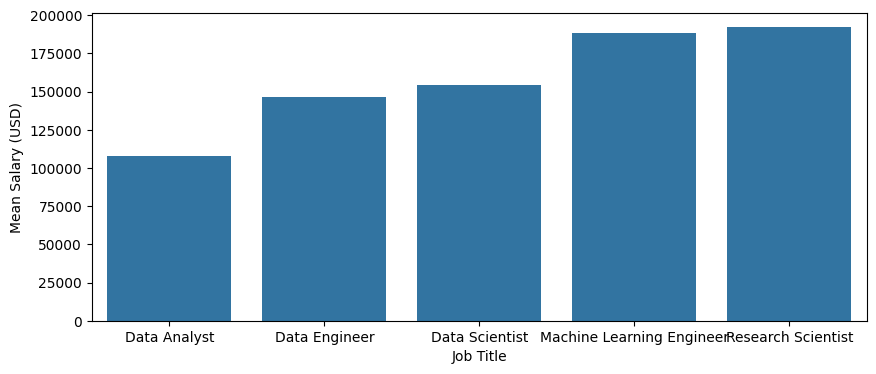

In [80]:
top_5_job_titles = data['job_title'].value_counts().head(5).index
data_top_5 = data[data['job_title'].isin(top_5_job_titles)]
mean_salary_by_job = data_top_5.groupby('job_title')['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(10,4))
sns.barplot(data=mean_salary_by_job, x='job_title', y='salary_in_usd')
plt.xlabel('Job Title')
plt.ylabel('Mean Salary (USD)')
plt.show()

In [81]:
data = data.drop(['salary', 'salary_currency'], axis=1)
data.head(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,US,0,US,M
5,2024,MI,FT,Data Science Manager,180000,US,0,US,M
6,2024,SE,FT,Business Intelligence Engineer,202800,US,0,US,M
7,2024,SE,FT,Business Intelligence Engineer,115000,US,0,US,M
8,2024,SE,FT,Data Architect,100000,GB,0,GB,M
9,2024,SE,FT,Data Architect,56250,GB,0,GB,M


In [82]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['experience_level', 'employment_type', 'job_title',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')


In [83]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col1 = ['employment_type', 'job_title', 'employee_residence', 'company_location','experience_level','company_size' ]
data[col1] = data[col1].apply(LabelEncoder().fit_transform)
print(data)

       work_year  experience_level  employment_type  job_title  salary_in_usd  \
0           2024                 2                2         90         120000   
1           2024                 2                2         90          70000   
2           2024                 2                0         90         130000   
3           2024                 2                0         90         110000   
4           2024                 2                2         87         240000   
...          ...               ...              ...        ...            ...   
16489       2020                 3                2         90         412000   
16490       2021                 2                2        140         151000   
16491       2020                 0                2         90         105000   
16492       2020                 0                0         28         100000   
16493       2021                 3                2         87          94665   

       employee_residence  

array([[<Axes: title={'center': 'work_year'}>,
        <Axes: title={'center': 'experience_level'}>,
        <Axes: title={'center': 'employment_type'}>],
       [<Axes: title={'center': 'job_title'}>,
        <Axes: title={'center': 'salary_in_usd'}>,
        <Axes: title={'center': 'employee_residence'}>],
       [<Axes: title={'center': 'remote_ratio'}>,
        <Axes: title={'center': 'company_location'}>,
        <Axes: title={'center': 'company_size'}>]], dtype=object)

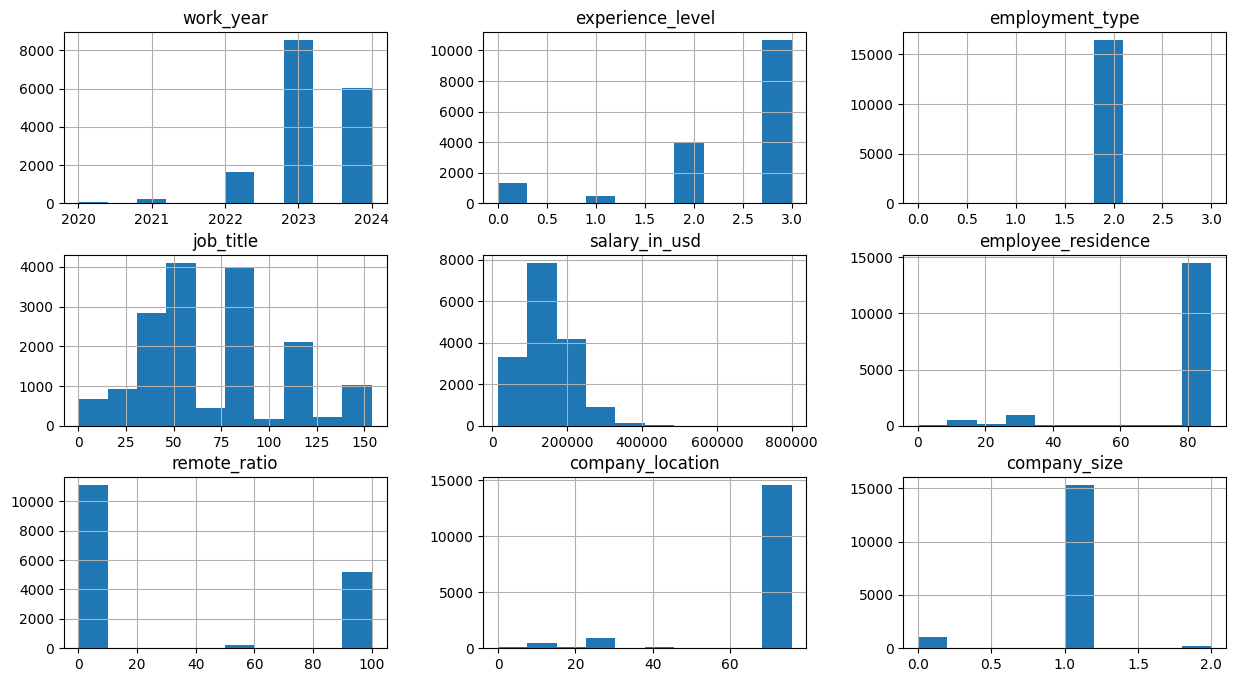

In [84]:
data.hist(figsize=(15,8))

<Axes: >

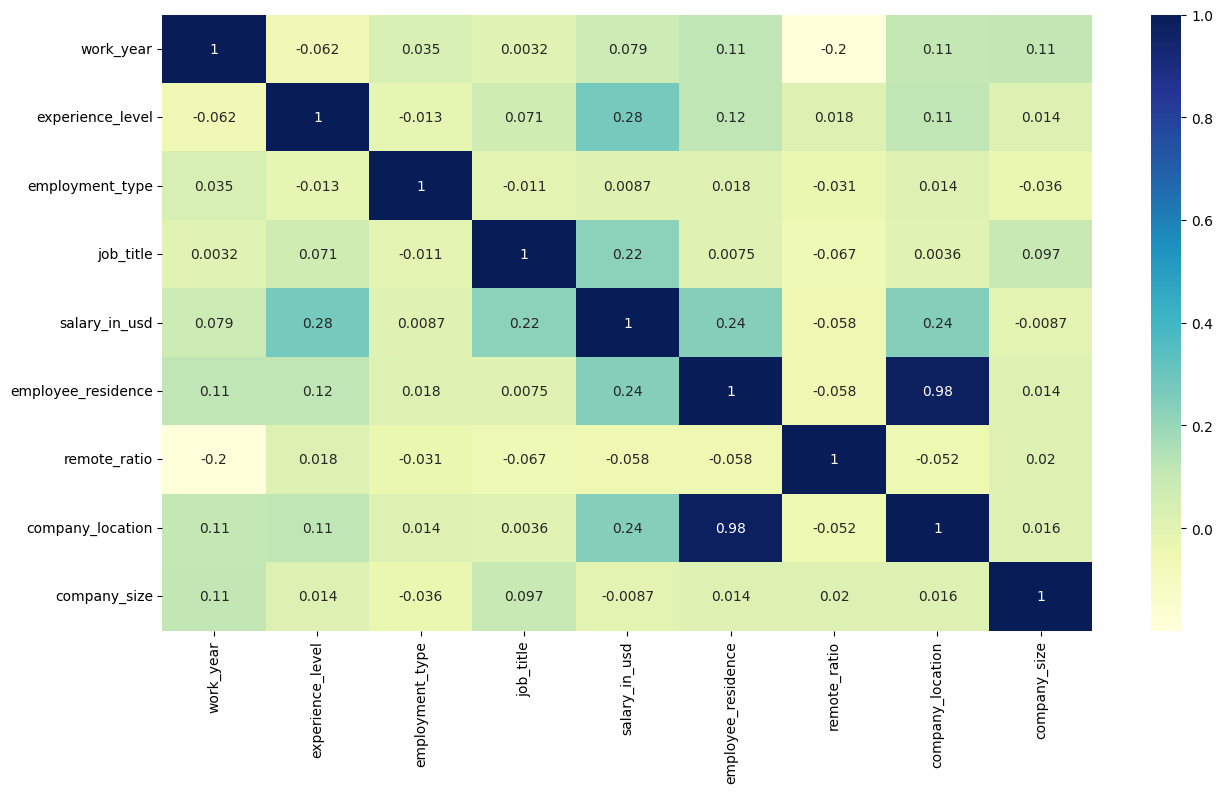

In [85]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

In [86]:
data[["salary_in_usd", "experience_level"]].corr()

,salary_in_usd,experience_level
salary_in_usd,1.000000,0.276505
experience_level,0.276505,1.000000


In [40]:
X = data.drop(['salary_in_usd'] , axis = 1)
Y = data['salary_in_usd']

In [87]:
X.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [88]:
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=58)

In [90]:
sc=MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [91]:
print(f"x dataset shape: {X.shape}")
print(f"x train shape: {X_train.shape}")
print(f"x test shape: {X_test.shape}")

x dataset shape: (16494, 8)
x train shape: (13195, 8)
x test shape: (3299, 8)


In [94]:
input_shape = X_train.shape[1]

In [92]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [95]:
# Model

def build_model(input_shape, hidden_units):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_units[0],
                              activation='relu',
                              kernel_initializer='he_normal',
                              bias_regularizer=tf.keras.regularizers.l2(0.001),
                              kernel_regularizer=tf.keras.regularizers.l2(0.001),
                              input_shape=input_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(hidden_units[1],
                              activation='sigmoid',
                              kernel_initializer='he_normal',
                              bias_regularizer=tf.keras.regularizers.l2(0.01),
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(hidden_units[2],
                              activation='sigmoid',
                              kernel_initializer='he_normal',
                              bias_regularizer=tf.keras.regularizers.l2(0.01),
                              kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(hidden_units[1],
                              activation='tanh',
                              kernel_initializer='he_normal',
                              bias_regularizer=tf.keras.regularizers.l2(0.001),
                              kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1,
                              activation='relu',
                              kernel_initializer='he_normal')
    ])
    return model



In [96]:
# Small model
small_model = build_model(input_shape=(input_shape,), hidden_units=[8, 16, 8])
# Modeli derleme
small_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Modeli eğitme
small_history = small_model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=2)


# Medium model
medium_model = build_model(input_shape=(input_shape,), hidden_units=[16, 32, 16])
# Modeli derleme
medium_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Modeli eğitme
medium_history = medium_model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=2)



# Large model
large_model = build_model(input_shape=(input_shape,), hidden_units=[32, 64, 32])
# Modeli derleme
large_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Modeli eğitme
large_history = large_model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=2)



# Modellerin performansını değerlendirme
small_loss, small_mae = small_model.evaluate(X_test, y_test, verbose=0)
medium_loss, medium_mae = medium_model.evaluate(X_test, y_test, verbose=0)
large_loss, large_mae = large_model.evaluate(X_test, y_test, verbose=0)

print("Small Model Loss: {:.4f}, MAE: {:.4f}".format(small_loss, small_mae))
print("Medium Model Loss: {:.4f}, MAE: {:.4f}".format(medium_loss, medium_mae))
print("Large Model Loss: {:.4f}, MAE: {:.4f}".format(large_loss, large_mae))


Epoch 1/50
330/330 - 4s - loss: 27064477696.0000 - mae: 149579.2969 - val_loss: 27790311424.0000 - val_mae: 151208.5625 - 4s/epoch - 13ms/step
Epoch 2/50
330/330 - 1s - loss: 27060461568.0000 - mae: 149567.4688 - val_loss: 27784153088.0000 - val_mae: 151190.3125 - 827ms/epoch - 3ms/step
Epoch 3/50
330/330 - 1s - loss: 27053680640.0000 - mae: 149546.9219 - val_loss: 27774601216.0000 - val_mae: 151161.0156 - 851ms/epoch - 3ms/step
Epoch 4/50
330/330 - 1s - loss: 27043858432.0000 - mae: 149517.1406 - val_loss: 27763869696.0000 - val_mae: 151128.8281 - 787ms/epoch - 2ms/step
Epoch 5/50
330/330 - 1s - loss: 27031468032.0000 - mae: 149479.0938 - val_loss: 27749779456.0000 - val_mae: 151085.6250 - 786ms/epoch - 2ms/step
Epoch 6/50
330/330 - 1s - loss: 27016757248.0000 - mae: 149433.8281 - val_loss: 27733221376.0000 - val_mae: 151034.7188 - 775ms/epoch - 2ms/step
Epoch 7/50
330/330 - 1s - loss: 26999836672.0000 - mae: 149381.9062 - val_loss: 27713755136.0000 - val_mae: 150974.6406 - 827ms/epoc

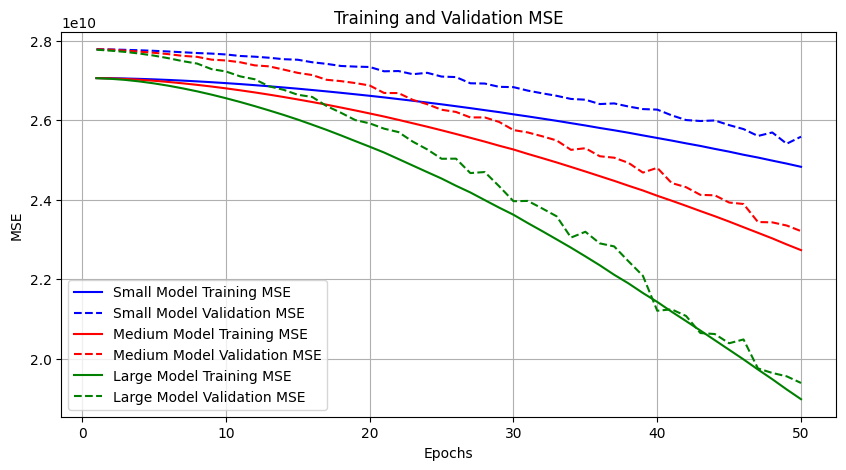

**********************************************************************************************************



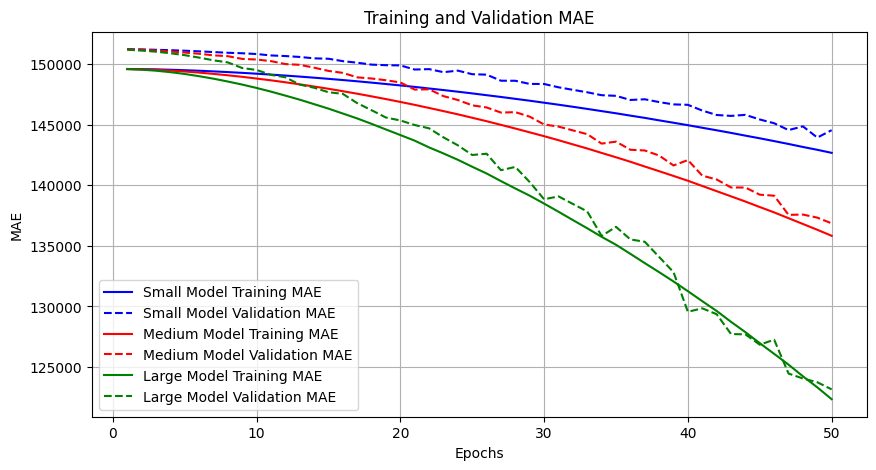

In [100]:
# Small model eğitim geçmişi
small_mse = small_history.history['loss']
small_val_mse = small_history.history['val_loss']
small_mae = small_history.history['mae']
small_val_mae = small_history.history['val_mae']

# Medium model eğitim geçmişi
medium_mse = medium_history.history['loss']
medium_val_mse = medium_history.history['val_loss']
medium_mae = medium_history.history['mae']
medium_val_mae = medium_history.history['val_mae']

# Large model eğitim geçmişi
large_mse = large_history.history['loss']
large_val_mse = large_history.history['val_loss']
large_mae = large_history.history['mae']
large_val_mae = large_history.history['val_mae']

# Epoch sayısı
epochs = range(1, len(small_mse) + 1)

# MSE Grafiği
plt.figure(figsize=(10, 5))
plt.plot(epochs, small_mse, 'b', label='Small Model Training MSE')
plt.plot(epochs, small_val_mse, 'b--', label='Small Model Validation MSE')
plt.plot(epochs, medium_mse, 'r', label='Medium Model Training MSE')
plt.plot(epochs, medium_val_mse, 'r--', label='Medium Model Validation MSE')
plt.plot(epochs, large_mse, 'g', label='Large Model Training MSE')
plt.plot(epochs, large_val_mse, 'g--', label='Large Model Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

print("**********************************************************************************************************\n")

# MAE Grafiği
plt.figure(figsize=(10, 5))
plt.plot(epochs, small_mae, 'b', label='Small Model Training MAE')
plt.plot(epochs, small_val_mae, 'b--', label='Small Model Validation MAE')
plt.plot(epochs, medium_mae, 'r', label='Medium Model Training MAE')
plt.plot(epochs, medium_val_mae, 'r--', label='Medium Model Validation MAE')
plt.plot(epochs, large_mae, 'g', label='Large Model Training MAE')
plt.plot(epochs, large_val_mae, 'g--', label='Large Model Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()


In [102]:
# Tahminler
small_predictions = small_model.predict(X_test)
medium_predictions = medium_model.predict(X_test)
large_predictions = large_model.predict(X_test)

# Verilerin DataFrame'e dönüştürülmesi
result_small = pd.DataFrame(data={"Tahmin": small_predictions.flatten(), "Gercek": y_test.values.flatten()})
result_medium = pd.DataFrame(data={"Tahmin": medium_predictions.flatten(), "Gercek": y_test.values.flatten()})
result_large = pd.DataFrame(data={"Tahmin": large_predictions.flatten(), "Gercek": y_test.values.flatten()})

# Sonuçların gösterilmesi
print("Small Model Tahminleri:")
print(result_small.head())
print("\nMedium Model Tahminleri:")
print(result_medium.head())
print("\nLarge Model Tahminleri:")
print(result_large.head())

104/104 [==============================] - 0s 2ms/step
Small Model Tahminleri:
         Tahmin  Gercek
0  10064.309570  126600
1      0.000000   63711
2  10737.346680  222200
3   8793.548828  240500
4   7003.439453   51962

Medium Model Tahminleri:
         Tahmin  Gercek
0  19209.037109  126600
1      0.000000   63711
2  22148.513672  222200
3  18447.648438  240500
4  15012.429688   51962

Large Model Tahminleri:
         Tahmin  Gercek
0  38800.449219  126600
1      0.000000   63711
2  41501.074219  222200
3  40799.261719  240500
4  32034.441406   51962


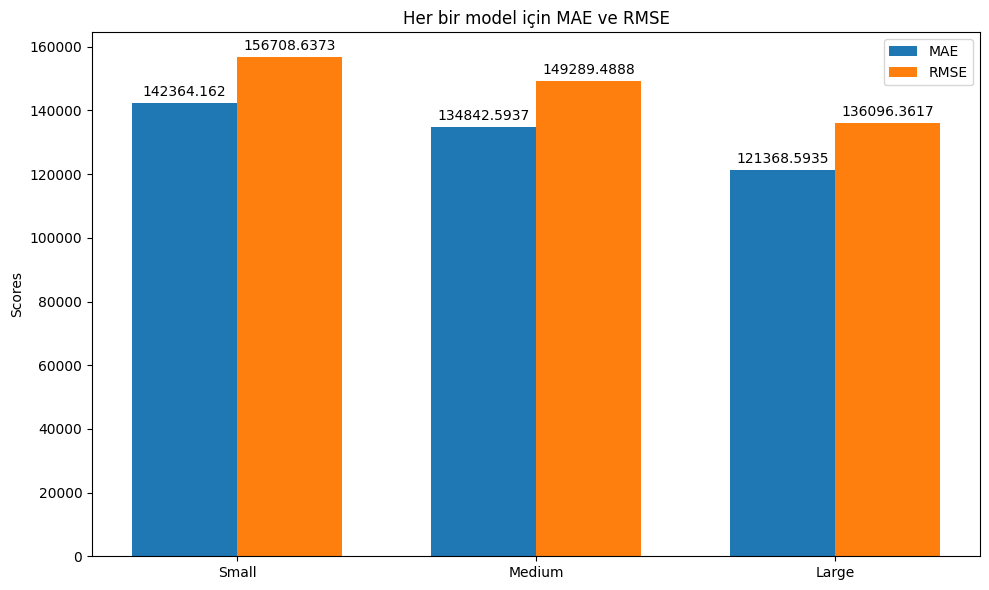

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Metriklerin hesaplanması
small_mae = mean_absolute_error(y_test, small_predictions)
small_rmse = np.sqrt(mean_squared_error(y_test, small_predictions))

medium_mae = mean_absolute_error(y_test, medium_predictions)
medium_rmse = np.sqrt(mean_squared_error(y_test, medium_predictions))

large_mae = mean_absolute_error(y_test, large_predictions)
large_rmse = np.sqrt(mean_squared_error(y_test, large_predictions))

labels = ['Small', 'Medium', 'Large']
mae_values = [small_mae, medium_mae, large_mae]
rmse_values = [small_rmse, medium_rmse, large_rmse]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, mae_values, width, label='MAE')
rects2 = ax.bar(x + width/2, rmse_values, width, label='RMSE')

ax.set_ylabel('Scores')
ax.set_title('Her bir model için MAE ve RMSE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


In [106]:
#pip install squarify

In [107]:
import squarify

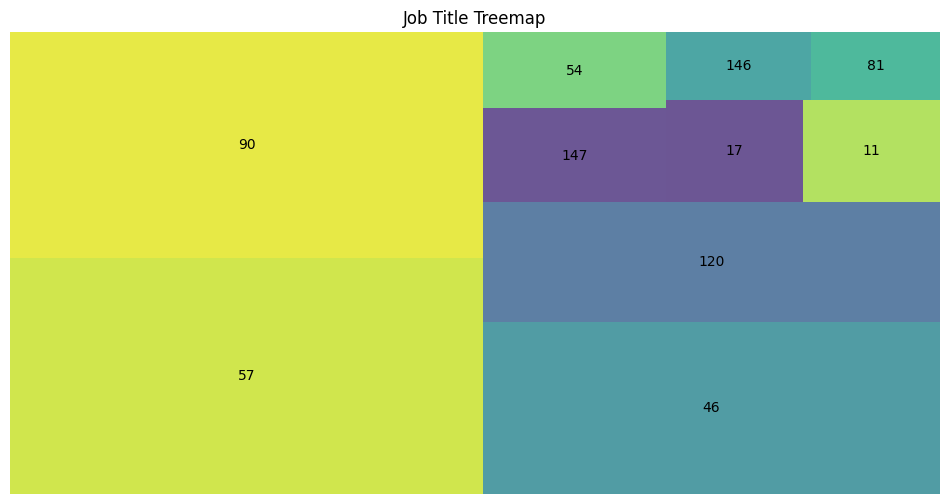

In [108]:
job_title_counts = data['job_title'].value_counts().head(10)

plt.figure(figsize=(12, 6))
squarify.plot(sizes=job_title_counts, label=job_title_counts.index, alpha=0.8)
plt.axis('off')
plt.title('Job Title Treemap')
plt.show()
